# Anomalies in RU2020 vote

Good map of regions:
https://regnum.ru/uploads/pictures/news/2019/03/11/regnum_picture_15523183991313502_normal.png

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cleaned.csv')
df['turnout'] = df['given']/np.maximum(1, df['nominal'])
df['support'] = df['yes']/np.maximum(1, df['given'])
df.head()

,region,tik,uik,nominal,given,received,damaged,yes,no,turnout,support
0,Адыгея,1 Адыгейская,1,2277,1925,1925,0,1749,176,0.845411,0.908571
1,Адыгея,1 Адыгейская,2,2694,2290,2290,7,2117,166,0.850037,0.924454
2,Адыгея,1 Адыгейская,3,2865,2441,2441,11,2171,259,0.852007,0.889390
3,Адыгея,1 Адыгейская,4,2054,1669,1669,8,1381,280,0.812561,0.827442
4,Адыгея,1 Адыгейская,5,714,607,607,1,473,133,0.850140,0.779242


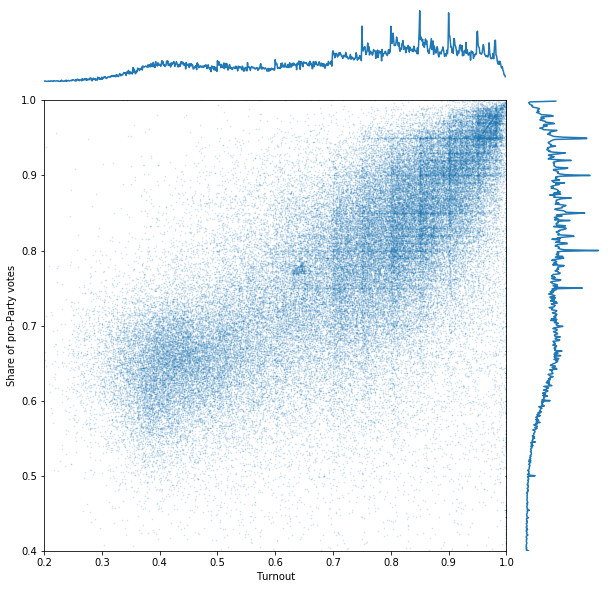

In [3]:
limits = [0.2, 0.4]
f = plt.figure(figsize=(10,10))
gs = f.add_gridspec(6, 6)

ax = f.add_subplot(gs[0, :-1])
x = np.histogram(df['turnout'].values, bins=1000, range=(0,1))
ax.plot(x[1][:-2], x[0][:-1]); # Very last bin is full of 100% for tiny polling points
ax.axis('off')
plt.xlim(limits[0], 1);

ax = f.add_subplot(gs[1:, -1])
x = np.histogram(df['support'].values, bins=1000, range=(0,1))
ax.plot(x[0][:], x[1][:-1]); # Very last bin is full of 100% for tiny polling points
ax.axis('off')
plt.ylim(limits[1], 1);

ax = f.add_subplot(gs[1:, :-1])
ax.plot(df['turnout'], df['support'], '.', markersize=1, alpha=0.2);
plt.xlabel('Turnout');
plt.ylabel('Share of pro-Party votes');
plt.xlim(limits[0], 1);
plt.ylim(limits[1], 1);

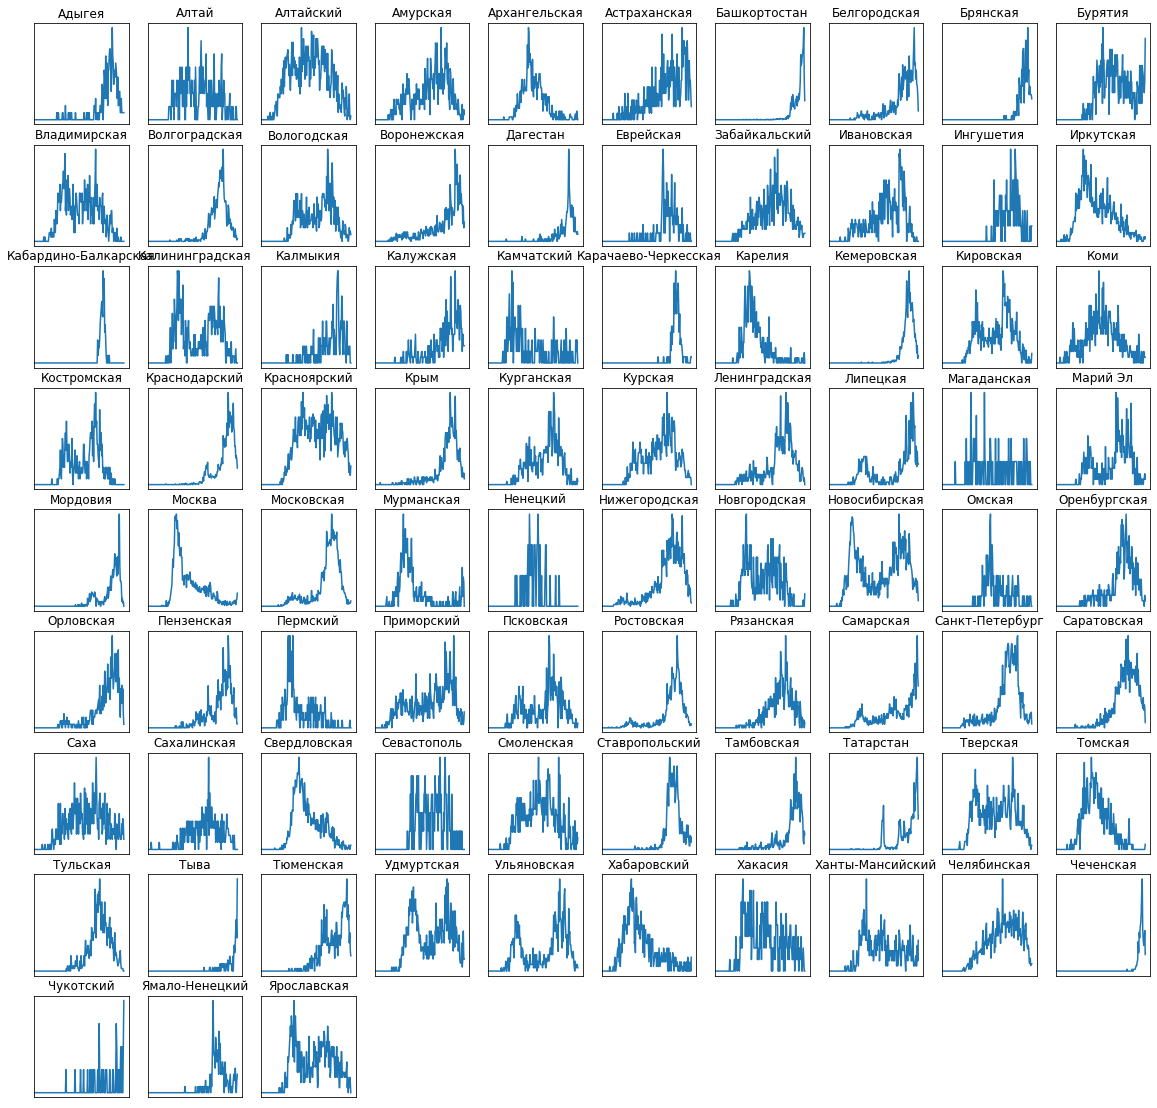

In [4]:
# Distributions by region
regions = np.unique(df['region'].values)
if False: # If we want to sort them by party support
    dfsum = df.groupby('region').agg({'turnout': [np.mean]})
    ind = np.argsort(dfsum.iloc[:,0].values) # Indices from lowest mean turnout to highest
    regions = regions[ind]

plt.figure(figsize=(20,22))
for i in range(len(regions)):
    region = regions[i]
    x = np.histogram(df['turnout'][df['region']==region].values, bins=200, range=(0,1))
    plt.subplot(10, 10, i+1);
    plt.plot(x[1][:-2], x[0][:-1]/np.max(x[0][:-1]));
    plt.xticks([])
    plt.yticks([])
    plt.xlim(0.1)
    plt.title(region)

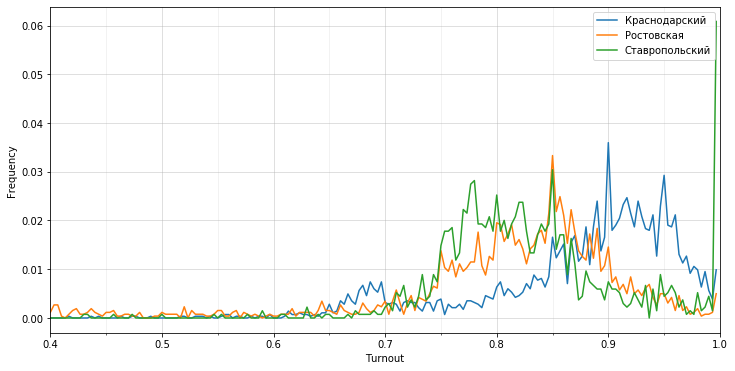

In [24]:
# One region of interest

regions = ['Краснодарский', 'Ростовская', 'Ставропольский']
category = 'turnout'

plt.figure(figsize=(12, 6))
ax = plt.subplot(111)
for region_name in regions:
    df1 = df[:][df.region == region_name]        
    x = np.histogram(df1[category].values, bins=300, range=(0,1))
    plt.plot(x[1][:-1], x[0]/np.sum(x[0]), label=region_name)
    ax.set_xticks(np.arange(0,1.1,0.1))
    ax.set_xticks(np.arange(0,1,0.05), minor=True)
    plt.grid(which='minor', alpha=0.2)
    plt.grid(which='major', alpha=0.5)
    plt.xlabel(category.capitalize())
    plt.ylabel('Frequency')
    #plt.title(region_name);
plt.xlim(0.4, 1)
plt.legend();

In [34]:
filt = np.logical_and(df1.support>0.715, df1.support<0.73)
temp = df1[filt]
temp.iloc[np.argsort(temp.support.values)]

,region,tik,uik,nominal,given,received,damaged,yes,no,turnout,support
22397,Пермский,"29 Пермь, Индустриальная",2942,2119,710,710,5,508,197,0.335064,0.715493
22398,Пермский,"29 Пермь, Индустриальная",2943,2056,760,760,6,544,210,0.369650,0.715789
22576,Пермский,"33 Пермь, Орджоникидзевская",3331,1542,646,646,4,463,179,0.418936,0.716718
22550,Пермский,"33 Пермь, Орджоникидзевская",3305,1599,741,740,0,532,208,0.463415,0.717949
22552,Пермский,"33 Пермь, Орджоникидзевская",3307,1421,812,811,0,583,228,0.571429,0.717980
22568,Пермский,"33 Пермь, Орджоникидзевская",3323,1567,823,822,0,591,231,0.525207,0.718104
22575,Пермский,"33 Пермь, Орджоникидзевская",3330,1339,827,826,0,594,232,0.617625,0.718259
22548,Пермский,"33 Пермь, Орджоникидзевская",3303,1265,806,805,0,579,226,0.637154,0.718362
22579,Пермский,"33 Пермь, Орджоникидзевская",3334,1601,806,805,0,579,226,0.503435,0.718362
22553,Пермский,"33 Пермь, Орджоникидзевская",3308,1509,838,837,0,602,235,0.555335,0.718377
